In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# df = pd.read_csv('./data/heart.csv')
# df = df.dropna(axis=1)
# X = df.drop('target', axis=1)
# y = df['target']

dataset = fetch_openml(name="credit-g")
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                            columns=dataset['feature_names'] + ['target'])

print(df.shape)

df_majority = df[df.target=="good"]
df_minority = df[df.target=="bad"]
n_samples = df_majority.shape[0] - df_minority.shape[0]
df_up = resample(df_minority, replace=True, n_samples=n_samples, random_state=100)
df_up = pd.concat([df,df_up])

def count_class(y):
    unique, counts = np.unique(y, return_counts=True)
    uqc = dict(zip(unique, counts))
    print(uqc)
    
X = df_up.drop('target', axis=1)
y = df_up['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

count_class(y_train)

(1000, 21)
{'bad': 560, 'good': 560}


In [2]:
#Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def plot_learning_curve(estimator, title, X, y, scoring="accuracy"):
    
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    n_jobs=None
    train_sizes=np.linspace(.1, 1.0, 20)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-Validation score")

    plt.legend(loc="best")
    return plt


def plot_model_complexity_curve(estimator, title, X, y, param_grid, scoring="accuracy"):
    param = list(param_grid.keys())[0]

    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    gs = GridSearchCV(estimator,
                  scoring=scoring,
                  cv=cv,
                  param_grid=param_grid)
    gs.fit(X, y)
    results = gs.cv_results_

    train_scores_mean = results[f"mean_train_score"]
    test_scores_mean = results[f"mean_test_score"]
    

    x_axis = results[f"param_{param}"].data
    new_axis = []
    for p in x_axis:
        if isinstance(p, tuple):
            j = '_'.join([str(x) for x in p])
            new_axis.append(j)
    if new_axis:
        x_axis = np.array(new_axis)
            
    plt.figure()
    plt.title(title)
    plt.xlabel(f"Model Complexity ({param})")
    plt.ylabel(scoring)
    plt.grid()
    plt.plot(x_axis, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(x_axis, test_scores_mean, 'o-', color="g",
             label="Cross-Validation score")
    plt.legend(loc="best")
    return plt   

def search_gridcv(estimator, X, y, param_grid, scoring="accuracy"):
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    gs = GridSearchCV(estimator,
                  scoring=scoring,
                  cv=cv,
                  param_grid=param_grid)
    gs.fit(X, y)
    results = gs.cv_results_
    print(gs.best_estimator_)
    print(gs.best_score_)
    

### Neural Networks
One of the algorithms for Neural Networks is Multi-Layer Perceptron, which learns by Backpropagation. It is composed of input layer, output layer and arbitary number of hidden layers.



In [19]:
from sklearn.neural_network import MLPClassifier
estimator = MLPClassifier()
clf = estimator.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")
print(estimator.get_params())

Accuracy Score: 0.7178571428571429
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<IPython.core.display.Javascript object>


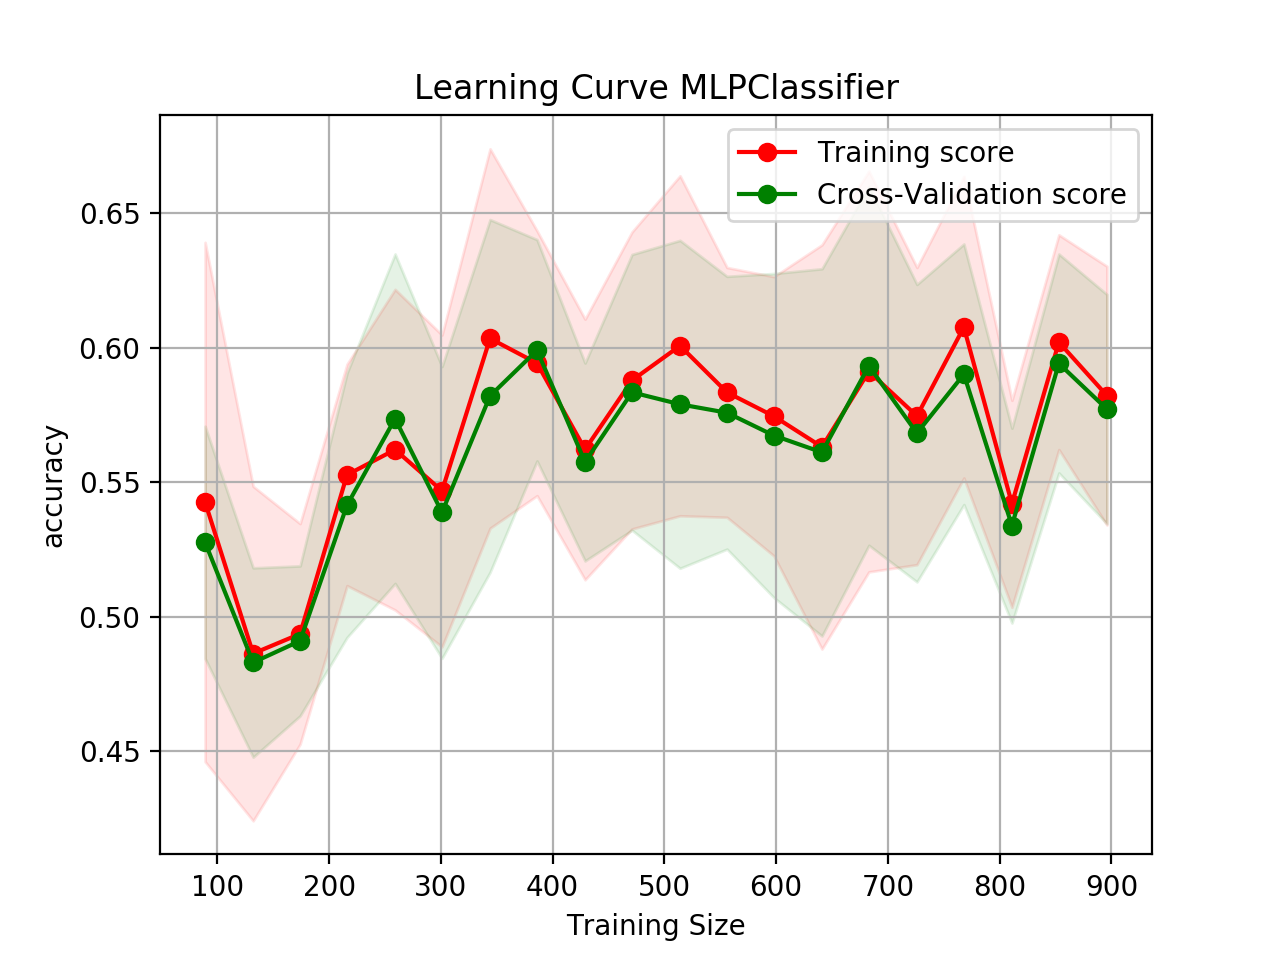

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [21]:
from sklearn.neural_network import MLPClassifier
estimator = MLPClassifier()
plot_learning_curve(estimator, f"Learning Curve MLPClassifier", X_train, y_train)

Inspecting the learning curve for MLPClassifier, the training and testing curve seems to behave the same, therefore there is no indication of bias or variance and the accuracy increases as training size is increased. Since we cannot increase the training size further, we can try chaning few hyperparameters to see if that helps 

<IPython.core.display.Javascript object>


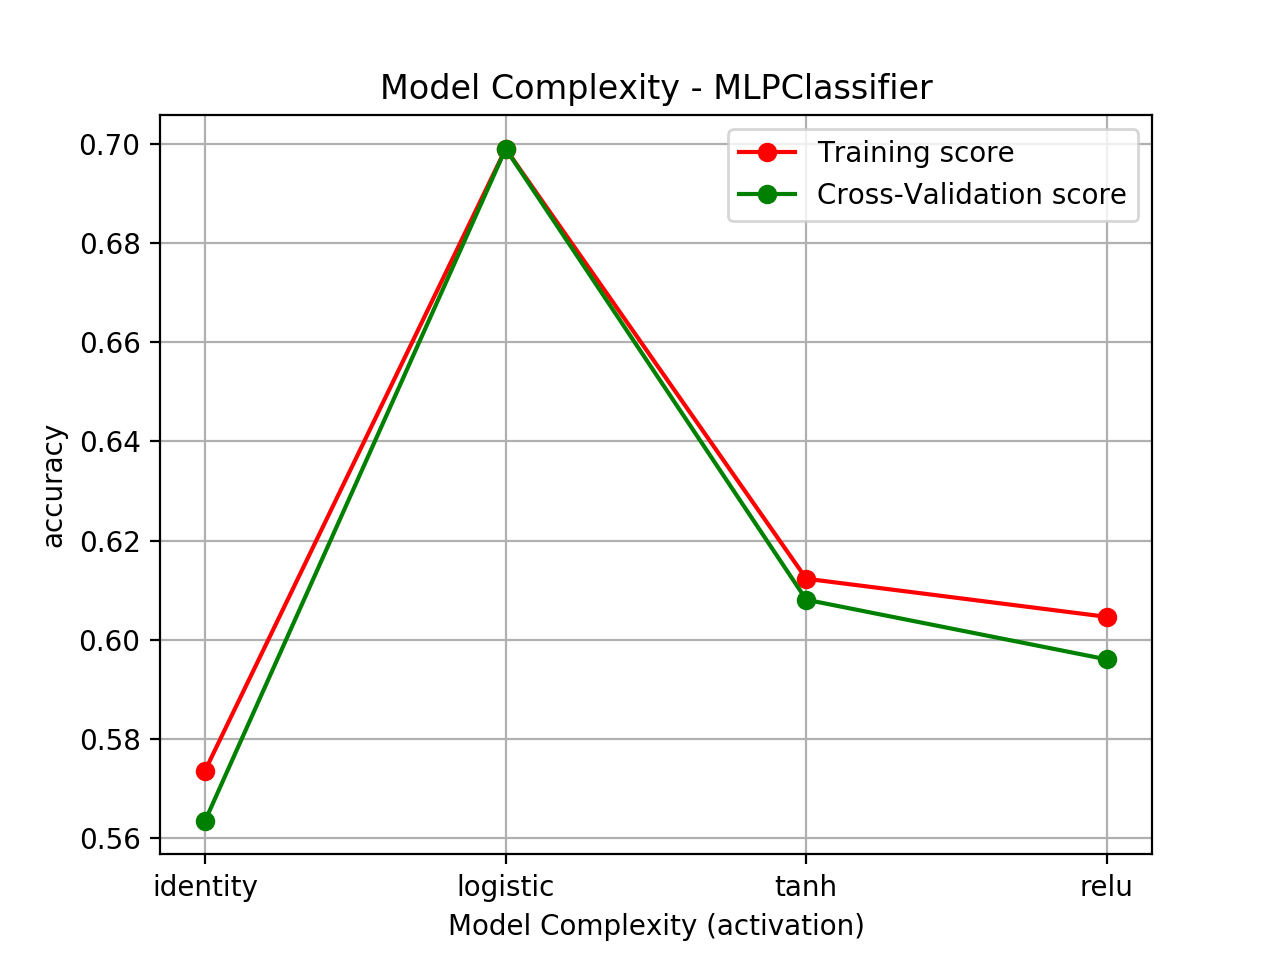

['identity' 'logistic' 'tanh' 'relu']
[0.57354911 0.69910714 0.61227679 0.60457589]


<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [53]:
estimator = MLPClassifier()
title = "Model Complexity - MLPClassifier"
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu']}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")


<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

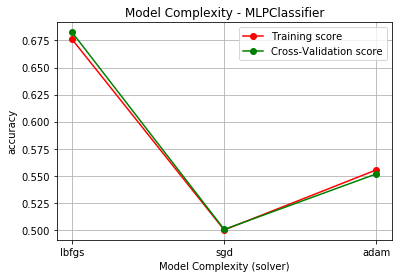

In [5]:
estimator = MLPClassifier()
title = "Model Complexity - MLPClassifier"
param_grid = {'solver': ["lbfgs", "sgd", "adam"]}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

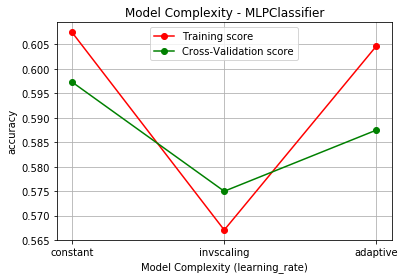

In [7]:
estimator = MLPClassifier()
title = "Model Complexity - MLPClassifier"
param_grid = {'learning_rate': ["constant", "invscaling", "adaptive"]}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

<IPython.core.display.Javascript object>


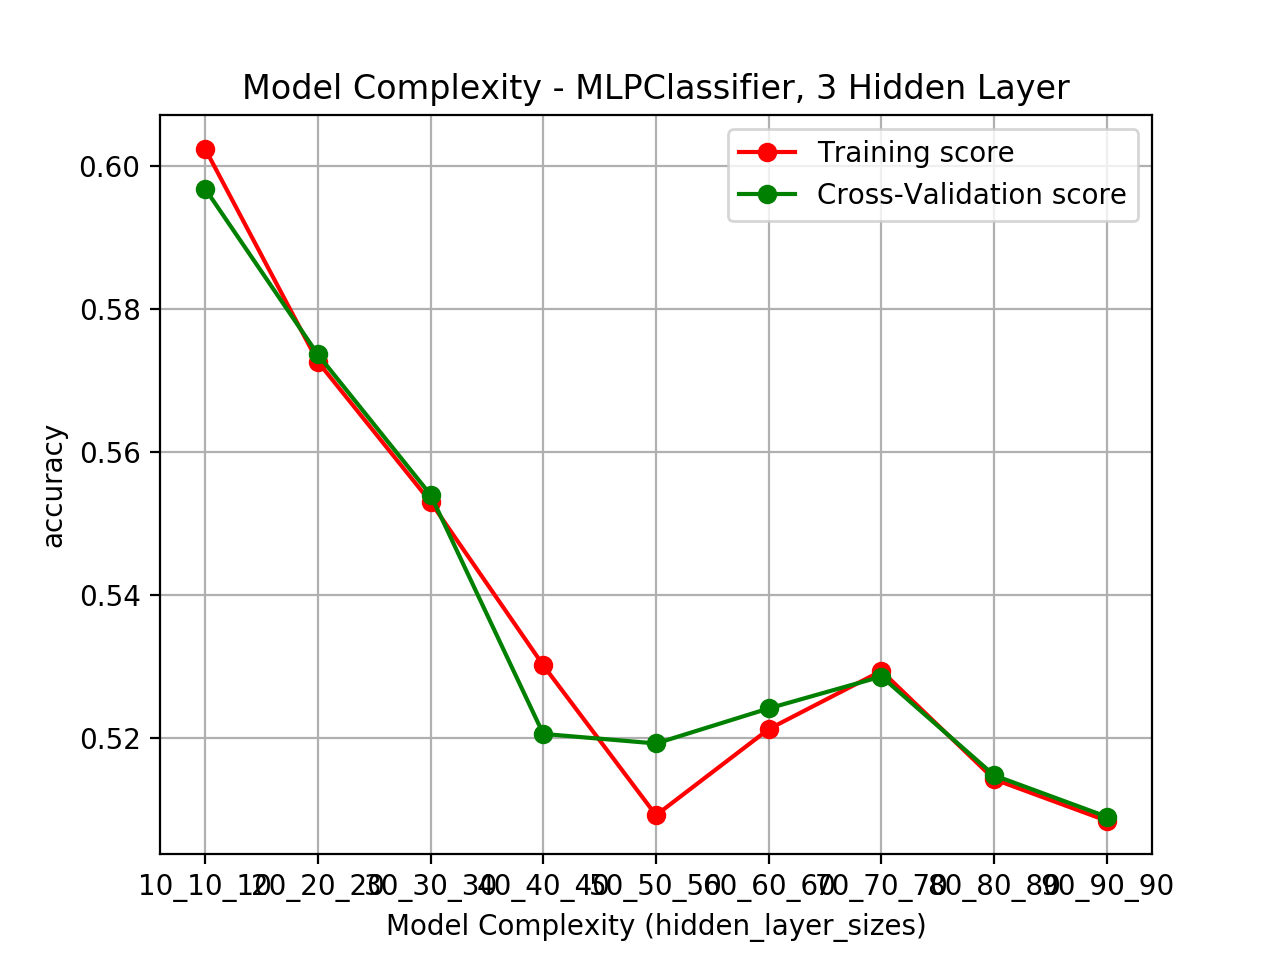

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [25]:
estimator = MLPClassifier()
title = "Model Complexity - MLPClassifier, 3 Hidden Layer"
param_grid = {'hidden_layer_sizes': [(i,)*3 for i in range(10, 100, 10)]}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")



<IPython.core.display.Javascript object>


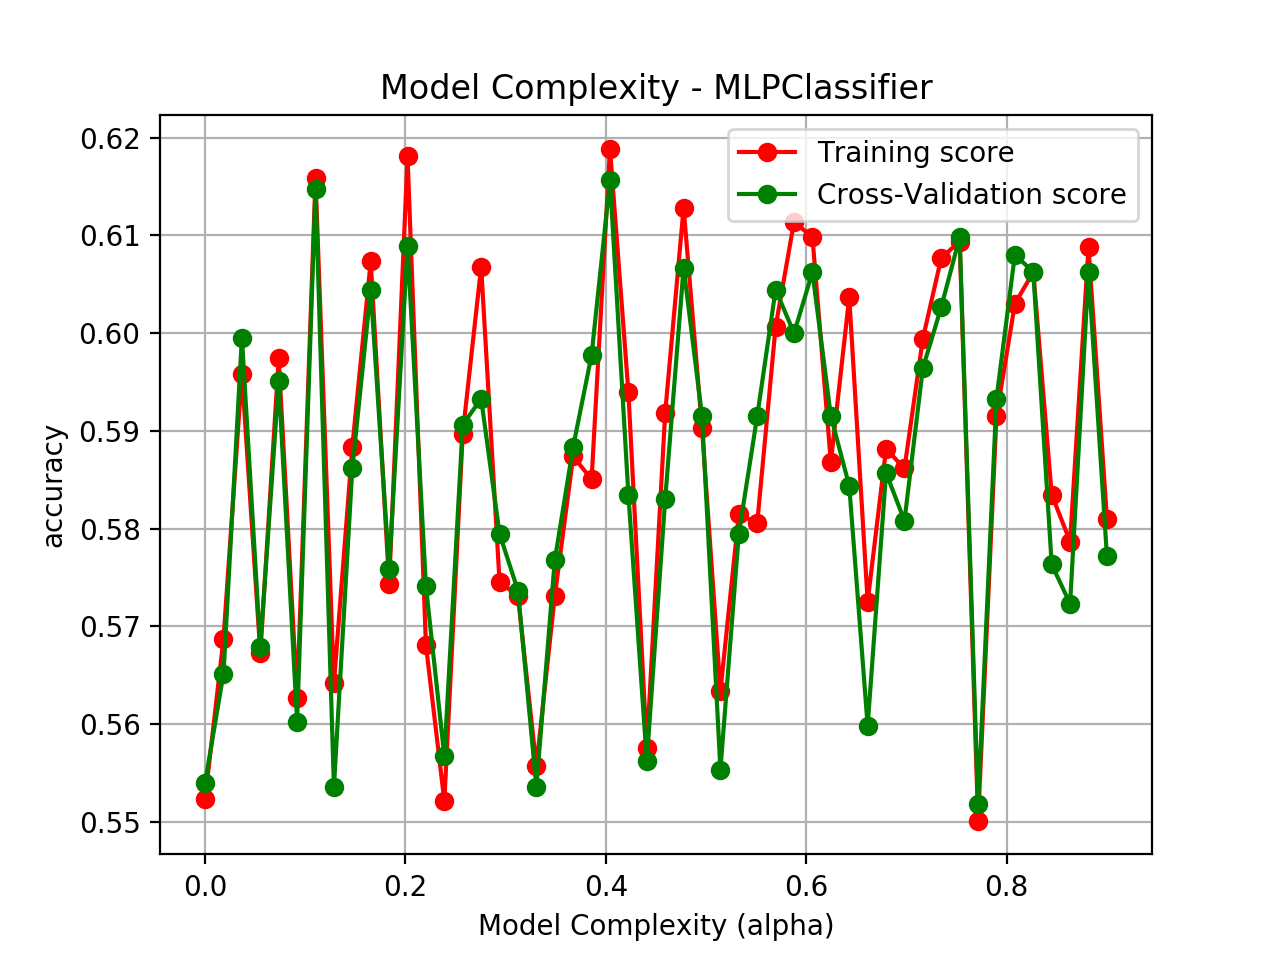

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [32]:
estimator = MLPClassifier()
title = "Model Complexity - MLPClassifier"
param_grid = {'alpha': np.linspace(0.0001, 0.9)}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

In [36]:
estimator = MLPClassifier()

all_param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(i,)*1 for i in range(10, 100, 10)],
    'solver': ["lbfgs", "sgd", "adam"]
}

search_gridcv(estimator, X_train, y_train, all_param_grid, scoring="accuracy")

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
0.7151785714285714


<IPython.core.display.Javascript object>


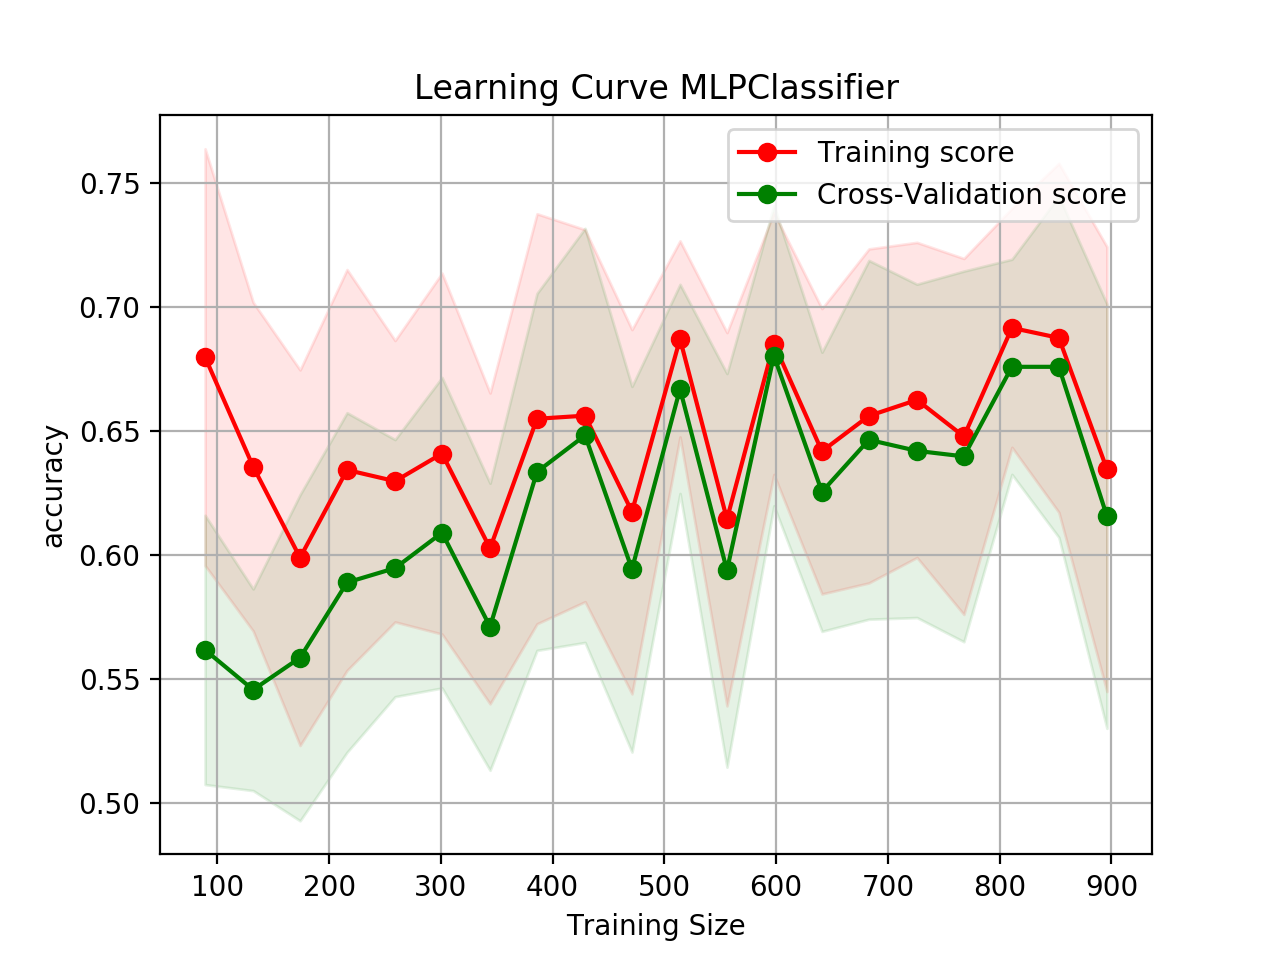

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [37]:
from sklearn.neural_network import MLPClassifier
estimator = MLPClassifier(solver="lbfgs", activation="logistic", hidden_layer_sizes=(40,))
plot_learning_curve(estimator, f"Learning Curve MLPClassifier", X_train, y_train)

In [ ]:
activation (logistic)
solver ( adam )
alpha 1e-4
unit of hidden layer
number of hidden layer
preprocess = Normalizer, minmaxscaler, standardscaler, robustscaler, quantiletransformer


AdaBoostClassifier
base_estimator=DecisionTree(max_depth = 1, max_leaf_nodes=10)



SVC
KNeighbo